In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [305]:
d=pd.read_csv("/content/titanic.csv")

In [306]:
d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [307]:
d.shape

(891, 12)

In [308]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [309]:
d.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [310]:
d.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: ylabel='Age'>

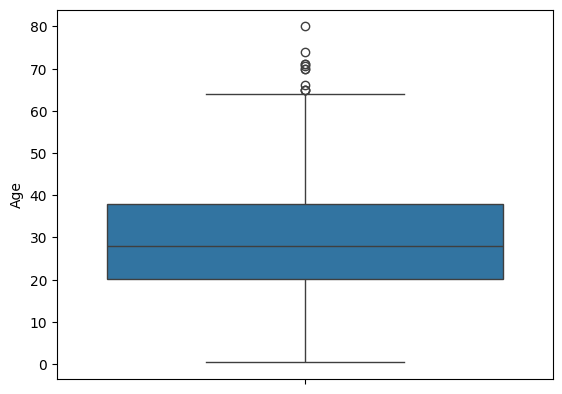

In [311]:
import seaborn as sns
sns.boxplot(d['Age'])

In [312]:
Q1=d['Age'].quantile(0.25)
Q3=d['Age'].quantile(0.75)
IQR=Q3-Q1
lowerbound=Q1-1.5*IQR
upperbound=Q3+1.5*IQR
outlier=d[(d['Age']<lowerbound) | (d['Age']>upperbound)]
outlier

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


In [313]:
d.dropna(subset=['Embarked'],inplace=True)

In [314]:
d.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [315]:
d['Age']=d['Age'].fillna(d['Age'].mean())


In [316]:
d.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [317]:

d['Cabin']=d['Cabin'].fillna(d['Cabin'].mode()[0])

In [318]:
d.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [319]:
d=d.drop('Name',axis=1)

In [320]:
d

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,female,29.642093,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,male,26.000000,0,0,111369,30.0000,C148,C


In [321]:
print(d['Ticket'].dtype)

object


In [322]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
d['Embarked']=le.fit_transform(d['Embarked'])
d['Sex']=le.fit_transform(d['Sex'])
d['Ticket']=le.fit_transform(d['Ticket'])
d['Cabin']=le.fit_transform(d['Cabin'])

In [323]:
d

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.000000,1,0,522,7.2500,46,2
1,2,1,1,0,38.000000,1,0,595,71.2833,80,0
2,3,1,3,0,26.000000,0,0,668,7.9250,46,2
3,4,1,1,0,35.000000,1,0,48,53.1000,54,2
4,5,0,3,1,35.000000,0,0,471,8.0500,46,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,100,13.0000,46,2
887,888,1,1,0,19.000000,0,0,14,30.0000,29,2
888,889,0,3,0,29.642093,1,2,674,23.4500,46,2
889,890,1,1,1,26.000000,0,0,8,30.0000,59,0


In [324]:
x=d.drop('Survived',axis=1)

In [325]:
y=d['Survived']

In [326]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,1,22.000000,1,0,522,7.2500,46,2
1,2,1,0,38.000000,1,0,595,71.2833,80,0
2,3,3,0,26.000000,0,0,668,7.9250,46,2
3,4,1,0,35.000000,1,0,48,53.1000,54,2
4,5,3,1,35.000000,0,0,471,8.0500,46,2
...,...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,100,13.0000,46,2
887,888,1,0,19.000000,0,0,14,30.0000,29,2
888,889,3,0,29.642093,1,2,674,23.4500,46,2
889,890,1,1,26.000000,0,0,8,30.0000,59,0


In [327]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [328]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(xtrain,ytrain)

SVC(kernel='linear')

In [329]:
y_pred=model.predict(xtest)

In [330]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,ytest))

0.7921348314606742
